In [352]:
#Importing some relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import scipy.stats as stats

In [353]:
#Reading the data
df = pd.read_csv('loan_data.csv') #Making a dataframe

In [354]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


The Target variable is _not.fully.paid_ 

In [355]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

There are no null values.

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


There are no null values. Only _purpose_ has an _object_ dtype

In [357]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

There are only two yes/no parameters - credit.policy and not.fully.paid

In [358]:
df.skew()

credit.policy        -1.539621
int.rate              0.164420
installment           0.912522
log.annual.inc        0.028668
dti                   0.023941
fico                  0.471260
days.with.cr.line     1.155748
revol.bal            11.161058
revol.util            0.059985
inq.last.6mths        3.584151
delinq.2yrs           6.061793
pub.rec               5.126434
not.fully.paid        1.854592
dtype: float64

Some of the data is highly skewed - We shall normalise some of the columns

In [359]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis 

## Univariate Analysis 

0    8045
1    1533
Name: not.fully.paid, dtype: int64

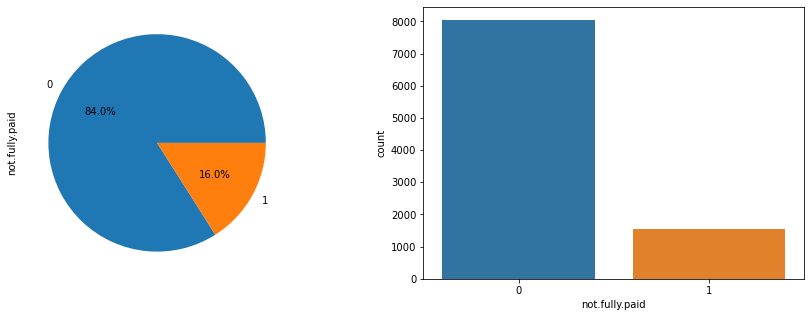

In [360]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['not.fully.paid'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['not.fully.paid'])
df['not.fully.paid'].value_counts()

Most people have not been able to pay back the loan. The data is highly skewed. SMOTE may be used.

1    7710
0    1868
Name: credit.policy, dtype: int64

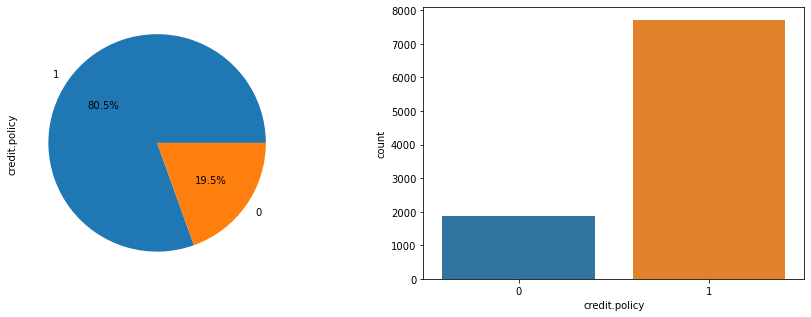

In [361]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['credit.policy'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['credit.policy'])
df['credit.policy'].value_counts()

Most people did accept the criteria for having the loan

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

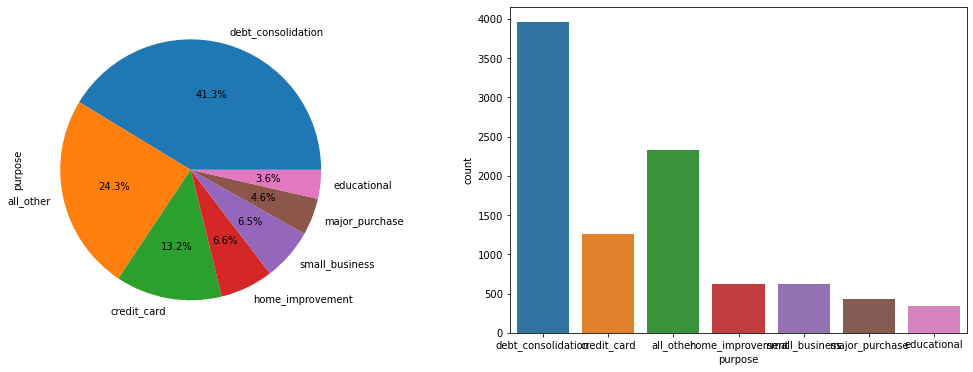

In [362]:
#How do people divide according to purpose
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
df['purpose'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['purpose'])
df['purpose'].value_counts()

Most people are taking loans for debt consolidation, but all purposes are relevant.

### Creating Histograms

In [363]:
#A unique list of features we would like to see the hist plots of
hist_list = []
for items in df:
    hist_list.append(items)

hist_list = hist_list[2:-3]

Javascript Code to remove scroll windows

In [364]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [365]:
for items in hist_list:
    #Using plotly to create histograms
    fig = px.histogram(df, x=df[items])
    fig.show()

We can see both discrete and continuous variables - that make up both very heavily skewed as well as normal curves. Some features have a many values with 0. This skewness might not affect the accuracy in ensemble approaches. Still, we normalise so very skewed curves.

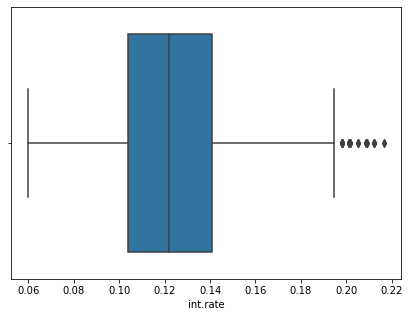

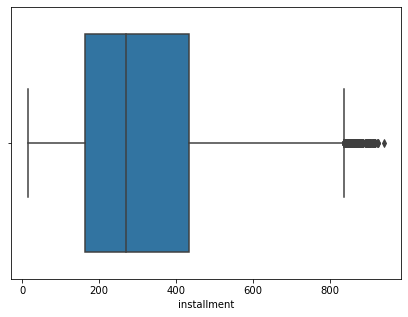

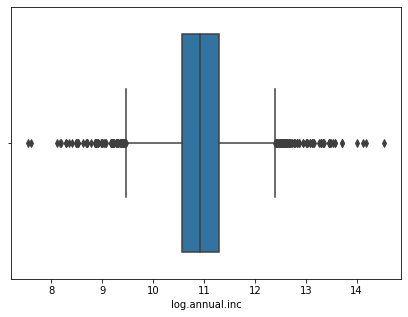

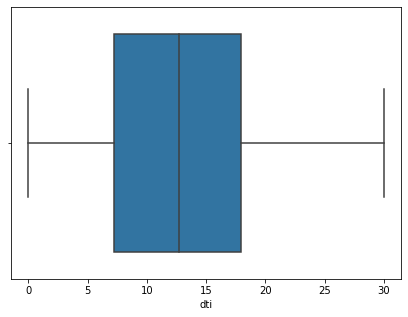

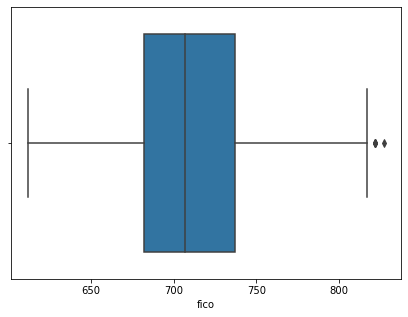

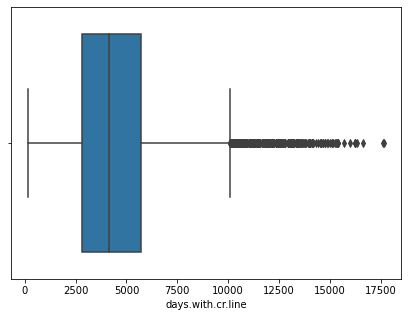

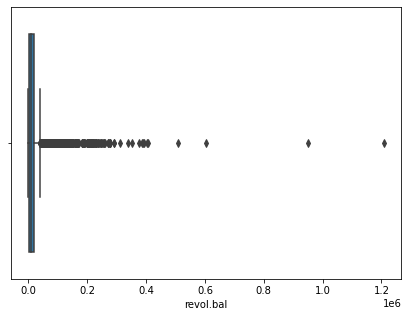

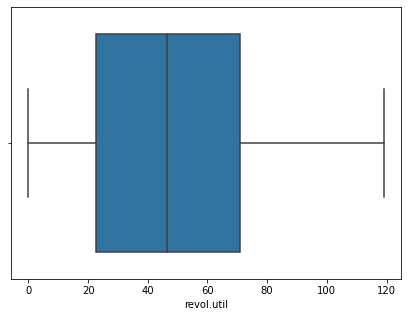

In [366]:
#Creating boxplots
for items in hist_list[:-1]:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[items])

The revol.bal seems to be highly skewed and hence requires transformation

In [367]:
#Dealing with Outliers in revol.bal
def Zscore_outlier(df,col_name):
    df = df[col_name]
    m = np.mean(df)
    sd = np.std(df) 
    out=[]
    indices=[]
    b_list = [b(x,m,sd) for x in df]
    out.append(b_list)
    out = out[0]
    for i in range(len(out)):
        if out[i]==True:
            indices.append(i)
    out = [out.remove(x) for x in out if type(x) =='Bool' ]
    return indices

def b(x,m,sd):
    z = (x-m)/sd
    if np.abs(z) > 3: 
        return True
    else:
        return False

This detoured method was used because there were _\n_ in every index which were hard to remove. Hence, this method seemed more workable.

In [368]:
out = Zscore_outlier(df,'revol.bal')
#Drop the outliers
df.drop(out,axis=0)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


<AxesSubplot:xlabel='revol.bal'>

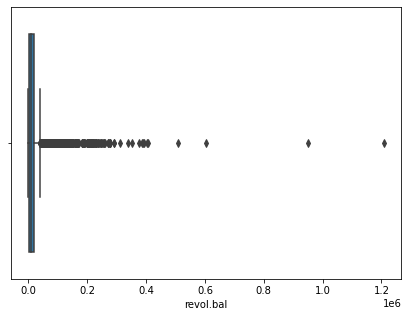

In [369]:
#Box plot of revol.bal after removing outliers
plt.figure(figsize=(7,5))
sns.boxplot(df['revol.bal'])

Even after removing the outliers, there are still a lot of outliers left due to the skew. Hence, we will see its importance and if we don't see it to be very prominent, we will remove the feature altogether.

## Multivariate Analysis 

<AxesSubplot:xlabel='purpose', ylabel='count'>

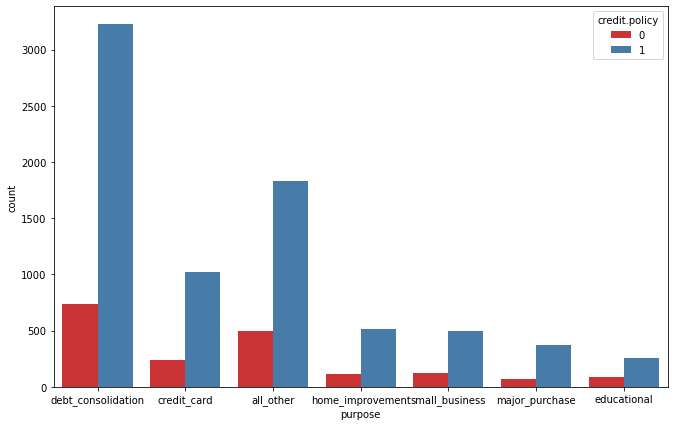

In [370]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='credit.policy',data=df,palette='Set1')

There is no special purpose which does better than other -- All have a very standard ratio. However, people with debt_consolidation are less likely to get the loan.

<AxesSubplot:xlabel='purpose', ylabel='count'>

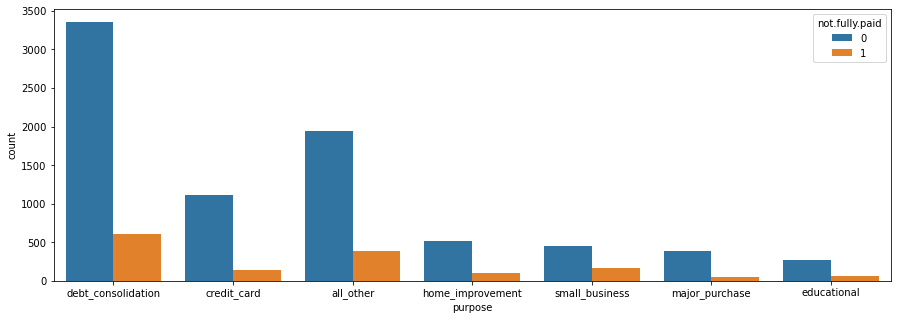

In [371]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='purpose', hue="not.fully.paid")

In [372]:
#The df where the loan was paid back
a = df[df['not.fully.paid']==1]
#The df where people did qualify to get the loan
b = df[df["credit.policy"]==1]
#The df where people did payback and also qualified for the credit policy
c = a[a['credit.policy']==1]

print("People who did qualify to get the loan : " , len(b))
print("People who did  : " , len(a))
print("People who qualified and did pay back the loan : " , len(c))
print("The effectiveness of the credit policy :  %.2f%%" % (len(c)/len(b)*100))

People who did qualify to get the loan :  7710
People who did  :  1533
People who qualified and did pay back the loan :  1014
The effectiveness of the credit policy :  13.15%


As we already know, most people have not paid the debt back -- and a similar pattern is seen in payback. Thus, we can say that the credit policy of lending club is not very effective.

<AxesSubplot:xlabel='log.annual.inc', ylabel='Count'>

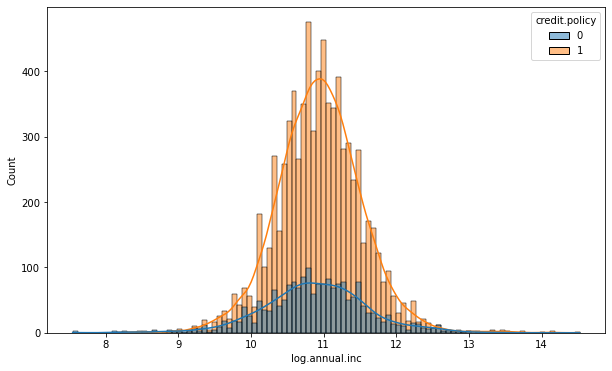

In [373]:
plt.figure(figsize=(10,6))
sns.histplot(x='log.annual.inc',hue='credit.policy',data=df,kde=True)

<AxesSubplot:xlabel='fico', ylabel='Count'>

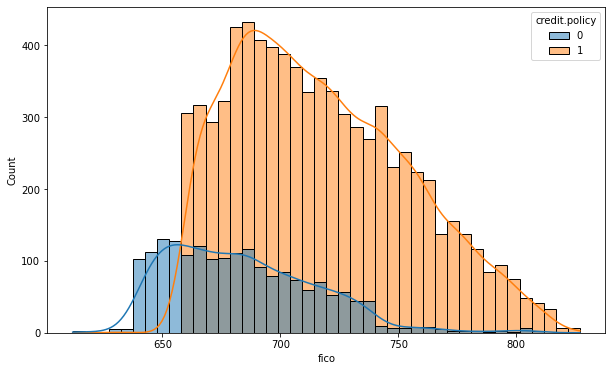

In [374]:
plt.figure(figsize=(10,6))
sns.histplot(x='fico',hue='credit.policy',data=df,kde=True)

<AxesSubplot:xlabel='days.with.cr.line', ylabel='Count'>

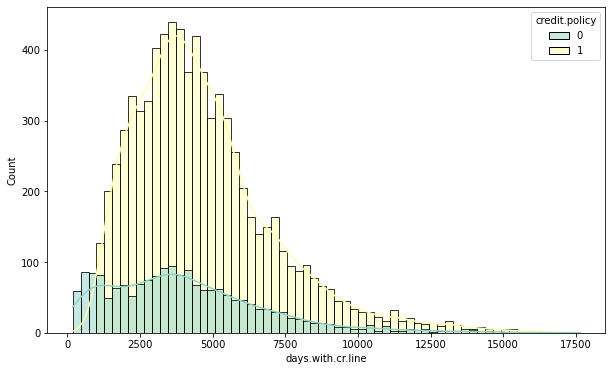

In [375]:
plt.figure(figsize=(10,6))
sns.histplot(x='days.with.cr.line',hue='credit.policy',data=df,kde=True,palette='Set3')

<AxesSubplot:xlabel='pub.rec', ylabel='count'>

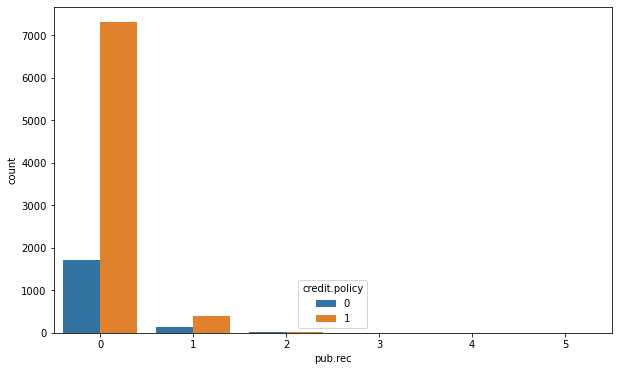

In [376]:
plt.figure(figsize=(10,6))
sns.countplot(x='pub.rec',hue='credit.policy',data=df)

<AxesSubplot:xlabel='purpose', ylabel='int.rate'>

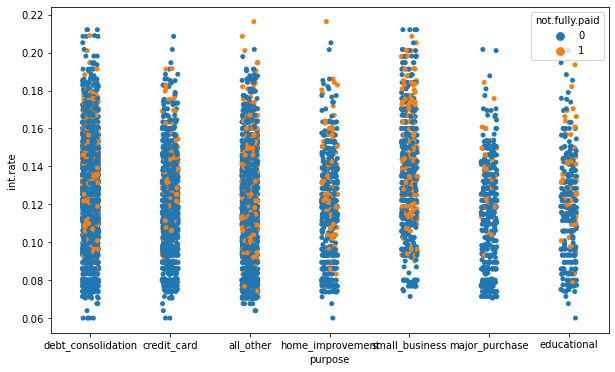

In [377]:
plt.figure(figsize=(10,6))
sns.stripplot(x='purpose',y='int.rate',hue='not.fully.paid',data=df)

Small business have higher chances of not paying back - and have higher interest rates

<AxesSubplot:xlabel='purpose', ylabel='fico'>

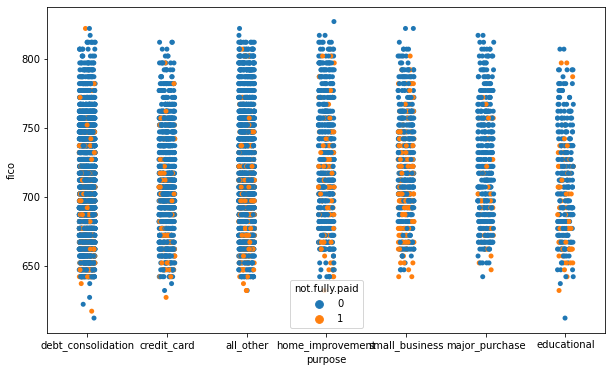

In [378]:
plt.figure(figsize=(10,6))
sns.stripplot(x='purpose',y='fico',hue='not.fully.paid',data=df)

<AxesSubplot:xlabel='purpose', ylabel='int.rate'>

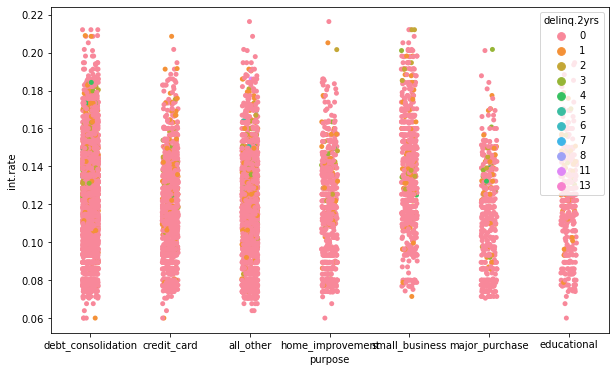

In [379]:
plt.figure(figsize=(10,6))
sns.stripplot(x='purpose',y='int.rate',hue='delinq.2yrs',data=df)

<AxesSubplot:>

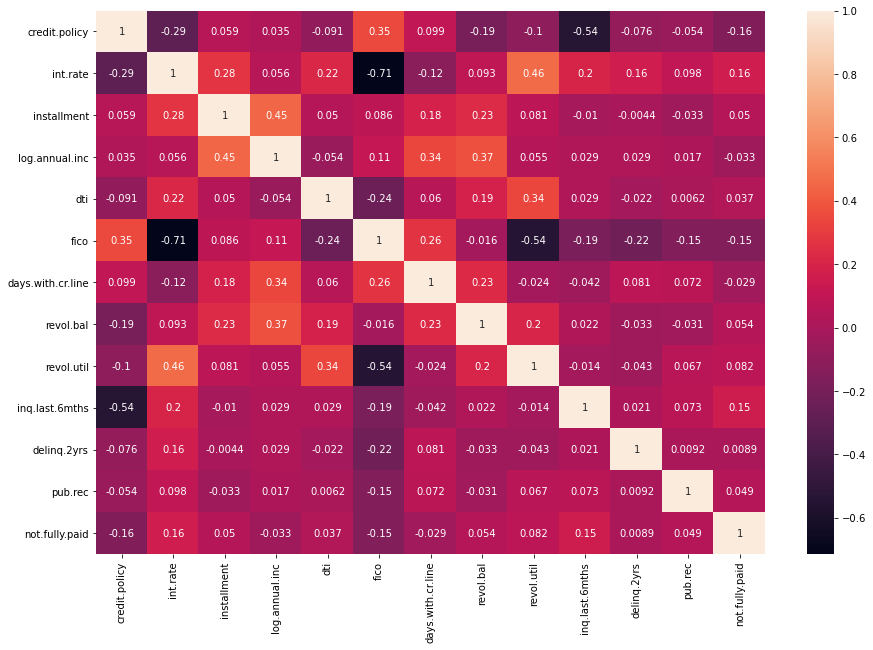

In [380]:
#Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

There are some correlated features, but none are heavily related. Hence, we do not drop any cols.

In [381]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['purpose']= label_encoder.fit_transform(df['purpose'])

df['purpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

In [382]:
#Creating another list of features which has all the features
features=[]
for items in df:
    features.append(items) 

In [383]:
def getFeatureImportance():
    from xgboost import XGBRegressor
    from matplotlib import pyplot
    # define the model
    X = df.iloc[:, :-1].values
    y = df.iloc[:,-1].values
    model = XGBRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_

    # summarize feature importance
    for i,v in enumerate(importance):
        print(features[i] + ' -  %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

credit.policy -  0, Score: 0.13859
purpose -  1, Score: 0.04909
int.rate -  2, Score: 0.06302
installment -  3, Score: 0.07292
log.annual.inc -  4, Score: 0.07010
dti -  5, Score: 0.06991
fico -  6, Score: 0.08205
days.with.cr.line -  7, Score: 0.07331
revol.bal -  8, Score: 0.07585
revol.util -  9, Score: 0.07759
inq.last.6mths -  10, Score: 0.08220
delinq.2yrs -  11, Score: 0.06712
pub.rec -  12, Score: 0.07826


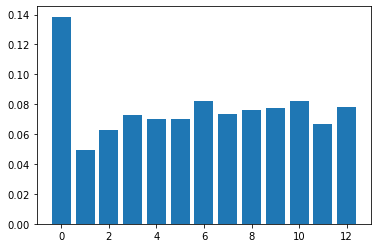

In [384]:
getFeatureImportance()

All features have fairly equal importance, but credit.policy has a higher correlation. We do NOT drop `revol.bal` here

In [385]:
#Splitting the data in X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [386]:
#Train and Test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [387]:
#Implementing the Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [388]:
#Importing the accuracy, F1, precision and recall libraries
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,precision_recall_fscore_support,recall_score

In [389]:
def GetRFC():
    #Importing the algorithm library
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    accuracy_score(y_test, y_pred)
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))

    print("\n")

In [390]:
def GetDTC():
    #Importing the algorithm library
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='macro',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))
    print("\n")

In [391]:
def GetXGB():
    #Importing the algorithm library
    from xgboost import XGBClassifier
    classifier = XGBClassifier(use_label_encoder=False,verbosity = 0)
    #Fitting the model
    classifier.fit(X_train, y_train)
    #Predicting the models
    y_pred = classifier.predict(X_test)
    
    #Creating Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))
    print("\n")
    #The scoring parameters
    precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1,beta = 1)
    # classification_report for Attrited Customer  
    print(classification_report(y_test,y_pred))
    print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
    print("Recall: %.2f%%" % ((recall_score(y_test,y_pred))*100.0))
    print("\n")

In [392]:
#Call the algorithms
print("_______ RFC _______ \n")
GetRFC()
print("_______ DTC _______ \n")
GetDTC()
print("_______ XGB _______ \n")
GetXGB()

_______ RFC _______ 

[[1982   32]
 [ 363   18]]


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2014
           1       0.36      0.05      0.08       381

    accuracy                           0.84      2395
   macro avg       0.60      0.52      0.50      2395
weighted avg       0.77      0.84      0.78      2395

Accuracy: 83.51%
Recall: 4.72%


_______ DTC _______ 

[[1681  333]
 [ 299   82]]
0.7361169102296451


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2014
           1       0.20      0.22      0.21       381

    accuracy                           0.74      2395
   macro avg       0.52      0.52      0.52      2395
weighted avg       0.75      0.74      0.74      2395

Accuracy: 73.61%
Recall: 21.52%


_______ XGB _______ 

[[1946   68]
 [ 350   31]]
0.8254697286012526


              precision    recall  f1-score   support

           0       0.85      0.97

### Applying KernelPCA

In [393]:
from sklearn.decomposition import KernelPCA
#applying KernelPCA on X_train and X_test
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [394]:
#Call the algorithms
print("_______ RFC _______ \n")
GetRFC()
print("_______ DTC _______ \n")
GetDTC()
print("_______ XGB _______ \n")
GetXGB()

_______ RFC _______ 

[[1908  106]
 [ 350   31]]


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2014
           1       0.23      0.08      0.12       381

    accuracy                           0.81      2395
   macro avg       0.54      0.51      0.51      2395
weighted avg       0.75      0.81      0.77      2395

Accuracy: 80.96%
Recall: 8.14%


_______ DTC _______ 

[[1683  331]
 [ 297   84]]
0.7377870563674321


              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2014
           1       0.20      0.22      0.21       381

    accuracy                           0.74      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.75      0.74      0.74      2395

Accuracy: 73.78%
Recall: 22.05%


_______ XGB _______ 

[[1982   32]
 [ 370   11]]
0.8321503131524008


              precision    recall  f1-score   support

           0       0.84      0.98

KernelPCA slightly improved the accuracy. The best performance is shown by is XGB - hence we K-Cross Validate it.

In [395]:
from xgboost import XGBClassifier
classifier = XGBClassifier(use_label_encoder=False,verbosity = 0)

In [396]:
#Validating with K=10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.18 %
Standard Deviation: 0.44 %


### Hence we get the best avaerage accuracy of 83.04% using XGB!